# Bipartite Graphs

A bipartite graph is an undirected graph $G=(V,E)$
where the set of vertices $V$ has been partitioned into
two mutually disjoint sets $L,R\subset V$.

All of the edges in the graph $G$ are between the two sets $L$ and $R$.
That is, for any edge $(l,r)\in E$ the vertex $l$ is in $L$ and $r\in R$.

In [1]:
import numpy as np
import numpy.random as npr
import networkx as nx
from networkx.algorithms import bipartite, matching
from matching_functions import *

## Example bipartite graph

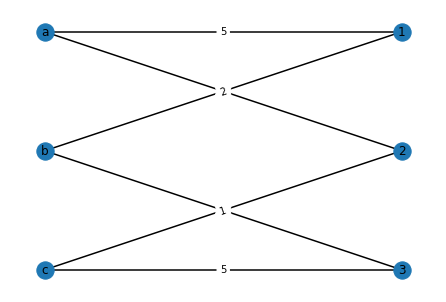

In [2]:
B = nx.Graph()

top_nodes = list("abc")
bottom_nodes = [1,2,3]
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

B.add_edge('a', 1, weight=5)
B.add_edge('a', 2, weight=2)

B.add_edge('b', 1, weight=2)
B.add_edge('b', 3, weight=1)

B.add_edge('c', 2, weight=1)
B.add_edge('c', 3, weight=5)

draw_bipartite(B)

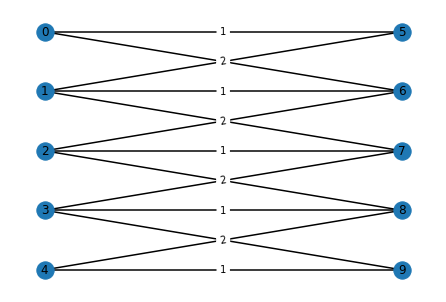

In [3]:
n = 5
B = nx.Graph()

top_nodes = list(range(n))
bottom_nodes = list(range(n,2*n))

B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

#sigma1 = npr.permutation(bottom_nodes)
#sigma2 = npr.permutation(bottom_nodes)

for i in range(n):
    #B.add_edge(i, sigma1[i], weight=npr.randint(10)+1)
    #B.add_edge(i, sigma2[i], weight=1)

    B.add_edge(i, n+i, weight=1)
    if i > 0:
        B.add_edge(i, n+i-1, weight=2)
    if i < n-1:
        B.add_edge(i, n+i+1, weight=1)

draw_bipartite(B, top_nodes=top_nodes, bottom_nodes=bottom_nodes)

## Matchings
A matching $M$ is a subset $M\subseteq E$ of the edges in the bipartite graph $G=(V,E)$,
where each vertex $v\in V$ has a single edge incident on it.

### Perfect matching
A perfect matching is a matching where each vertex in $L$ is matched with a vertex in $R$
and vertex in both $L$ and $R$ have a matching.

### Minimum weight matching
A minimum weight matching is a matching,
which has a less than or equal sum of edge weights when compered to any other matching.


### Minimum weight perfect matching
A minimum weight matching is a perfect matching,
if it has a less than or equal sum of edge weights when compered to any other perfect matching.

#### Example of a minimum weight perfect matching

Cost: 5


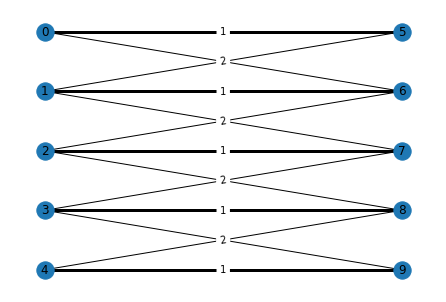

In [4]:
match = bipartite.matching.minimum_weight_full_matching(B, top_nodes=top_nodes)
match = [(v,match[v]) for v in top_nodes if v in match.keys()]
draw_bipartite(B, match=match, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
print("Cost:", total_cost(B, match))

### Maximum weight matching
Maximum weight matching is a matching which has the maximum sum of edge weights.

Note that maximum weight matching is maximal matching?
i.e. there can be added no more edges
to the matching.

#### Example
Note that this matching is not perfect, yet it has the maximum total weight.

Cost: 8


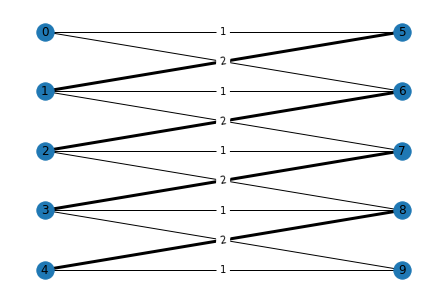

In [5]:
match = matching.max_weight_matching(B)
draw_bipartite(B, match=match, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
print("Cost:", total_cost(B, match))

### Maximum Weighted Perfect Matching 
Maximum weight perfect matching is a matching,
which has a greater or equal sum of edge weights when compered to any other perfect matching.

#### Example
Note that this matching is perfect, but its total weight is less then the previous example.

This example is a maximum weight perfect matching,
since it has the maximum total weight when we compare it to any other perfect matching.

Cost: 7


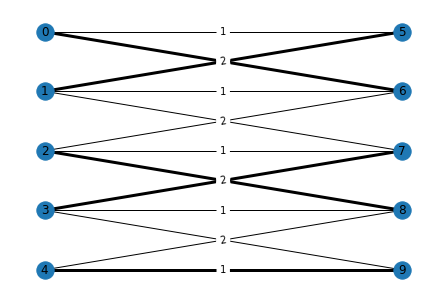

In [6]:
match = maximum_weight_full_matching(B, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
draw_bipartite(B, match=match, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
print("Cost:", total_cost(B, match))

### Random Perfect Matching

Cost: 10.34810391319868


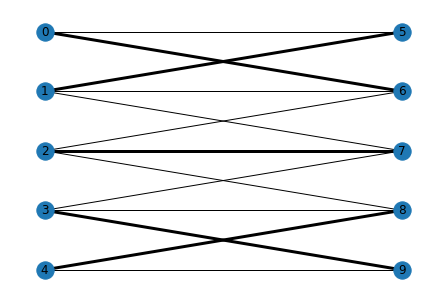

In [11]:
from matching_sampler import perturb_graph
G = perturb_graph(B)
match = maximum_weight_full_matching(G, top_nodes=top_nodes, bottom_nodes=bottom_nodes)
draw_bipartite(G, match=match, show_weights=False)
print("Cost:", total_cost(G, match))

In [19]:
biadjacency = bipartite.biadjacency_matrix(B, row_order=top_nodes)
biadjacency.toarray()

array([[1, 1, 0, 0, 0],
       [2, 1, 1, 0, 0],
       [0, 2, 1, 1, 0],
       [0, 0, 2, 1, 1],
       [0, 0, 0, 2, 1]])

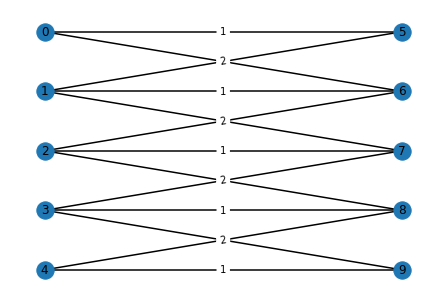

In [21]:
g = bipartite.from_biadjacency_matrix(biadjacency)
draw_bipartite(g)